# Diamond Price Prediction 

---

### Context

Diamond is one of the precious stones which are always in huge demand in the investment market. Diamonds are also used in many industrial applications like cutting but it is mostly used as a gemstone. The actual price of a diamond however is determined by a gemologist after examining its various features such as its carat, cut, color, and clarity. Dimensions of a diamond is also a very important parameter to determine its worth. Nearly, 142 million carats of diamonds were produced worldwide in 2019 alone. This makes it very important to come up with some smart technique to estimate its worth. 

 

---

### Problem Statement

A diamond distributor decided to put almost 2000 diamonds for auction. A jewellery company is interested in making a bid to purchase these diamonds in order to expand their business. As a data scientist, your job is to build a prediction model to predict the price of diamonds so that your company knows how much it should bid.













---

### Data Description

The **diamonds** dataset contains the prices and other attributes of almost 54,000 diamonds. Following are the attributes:  


|Column|Description|
|---:|:---|
|`carat`|weight of the diamond|
|`cut`|quality of the cut|
|`color`|diamond colour, from J (worst) to D (best)|
|`clarity`|a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))|
|`table`|The width of the diamond's table expressed as a percentage of its average diameter|
|`price`|price in US dollars|
|`x`|length in mm|
|`y`|width in mm|
|`z`|depth in mm|
|`depth`|total depth percentage = $\frac{2z}{x + y}$|

  **Dataset Link:** https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/whitehat-ds-datasets/diamonds.csv


---

### Things To Do

1. Explore the diamond dataset by creating the following plots:
   - Box plots between each categorical feature and the `price`.
   - Scatter plots between the numerical features and the `price`.
   
2. Convert categorical attributes into numerical attributes.

3. Create a correlation heatmap for all the columns.

4. Build a linear regression model by selecting the most relevant features to predict the price of diamonds.

5. Reduce multicollinearity (if exists) by eliminating highly correlated and high VIF features.

6. Evaluate the linear regression model by calculating the parameters such as coefficient of determination, MAE, MSE, RMSE, mean of residuals and by checking for homoscedasticity.


7.  Feature Encoding

8. Build a multiple linear regression model by selecting the most relevant features to predict the price of diamonds.
 
9.  Model Training using `statsmodels.api`

10. Evaluating the accuracy of the multiple linear regression model by R2 score and Adjusted R2 score values.




---

#### 1. Import Modules and Load Dataset

Link to the dataset: https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/whitehat-ds-datasets/diamonds.csv


In [1]:
# Import the required modules and load the dataset.
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/whitehat-ds-datasets/diamonds.csv")
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [2]:
# Get the information on DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [3]:
# Check if there are any null values. If any column has null values, treat them accordingly
df.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [4]:
# Drop 'Unnamed: 0' column as it is of no use
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


---

#### 2. Exploratory Data Analysis

We need to predict the value of `price` variable, using other variables. Thus, `price` is the target or dependent variable and other columns except `price` are the features or the independent variables. 

Perform the following tasks:

- Create Box plots between each **categorical** variable and the target variable `price` to sense the distribution of values.

- Create the Scatter plots between each **numerical** variable and the target variable `price`. Determine which variable(s) shows linear relationship with the target variable `price`. 

- Create a normal distribution curve for the `price`.


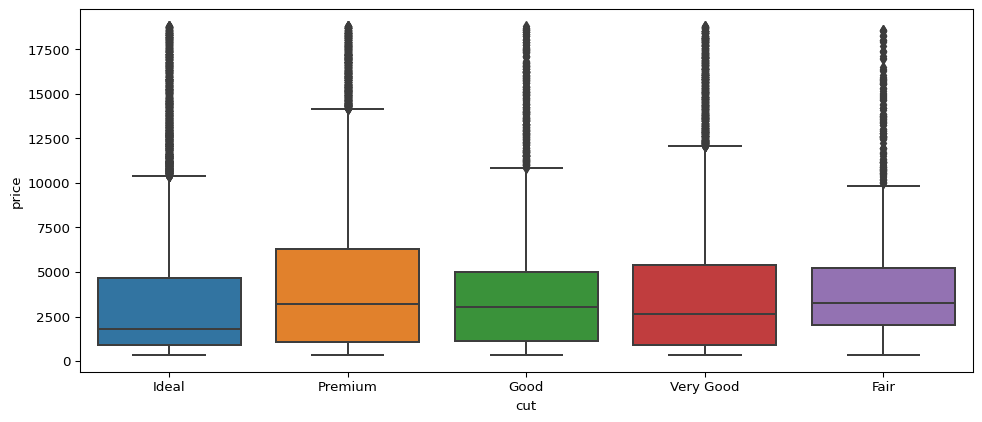

In [5]:
# Boxplot for 'cut' vs 'price'
plt.figure(figsize = (12, 5), dpi = 96)
sns.boxplot(x = 'cut', y = 'price', data = df)
plt.show()

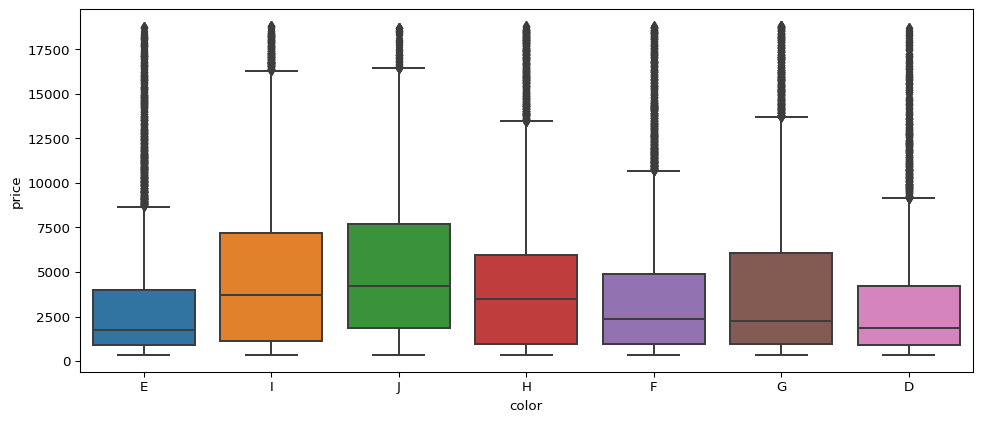

In [6]:
# Boxplot for 'color' vs 'price'
plt.figure(figsize = (12, 5), dpi = 96)
sns.boxplot(x = 'color', y = 'price', data = df)
plt.show()

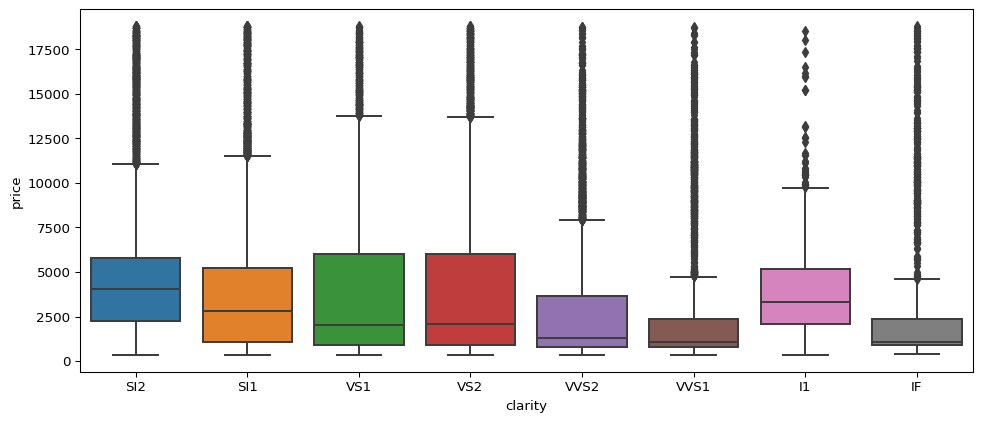

In [7]:
# Boxplot for 'clarity' vs 'price'
plt.figure(figsize = (12, 5), dpi = 96)
sns.boxplot(x = 'clarity', y = 'price', data = df)
plt.show()

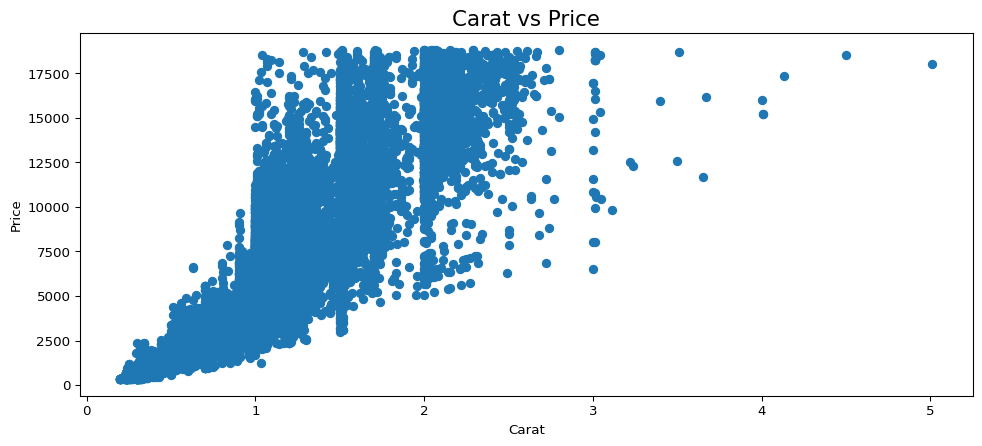

In [8]:
# Create scatter plot with 'carat' on X-axis and 'price' on Y-axis
plt.figure(figsize = (12, 5), dpi = 96)
plt.title("Carat vs Price", fontsize = 16)
plt.scatter(df['carat'], df['price'])
plt.xlabel("Carat")
plt.ylabel("Price")
plt.show()

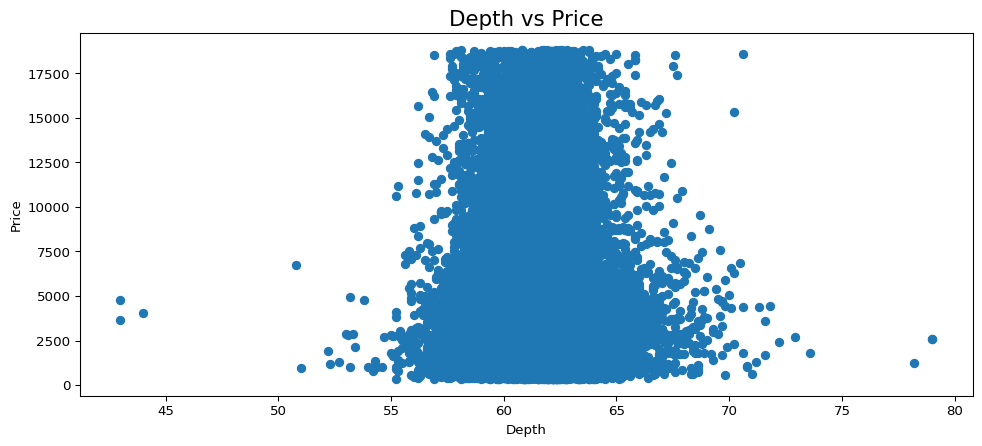

In [9]:
# Create scatter plot with 'depth' on X-axis and 'price' on Y-axis
plt.figure(figsize = (12, 5), dpi = 96)
plt.title("Depth vs Price", fontsize = 16)
plt.scatter(df['depth'], df['price'])
plt.xlabel("Depth")
plt.ylabel("Price")
plt.show()

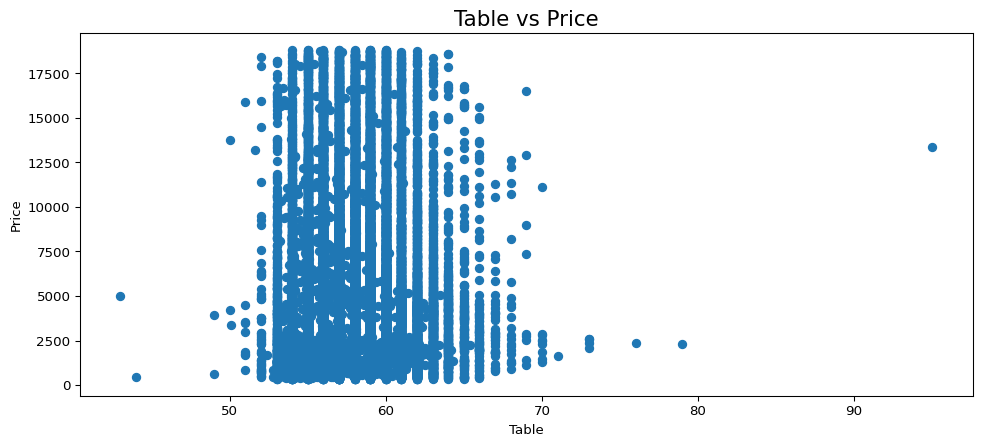

In [10]:
# Create scatter plot with 'table' on X-axis and 'price' on Y-axis
plt.figure(figsize = (12, 5), dpi = 96)
plt.title("Table vs Price", fontsize = 16)
plt.scatter(df['table'], df['price'])
plt.xlabel("Table")
plt.ylabel("Price")
plt.show()

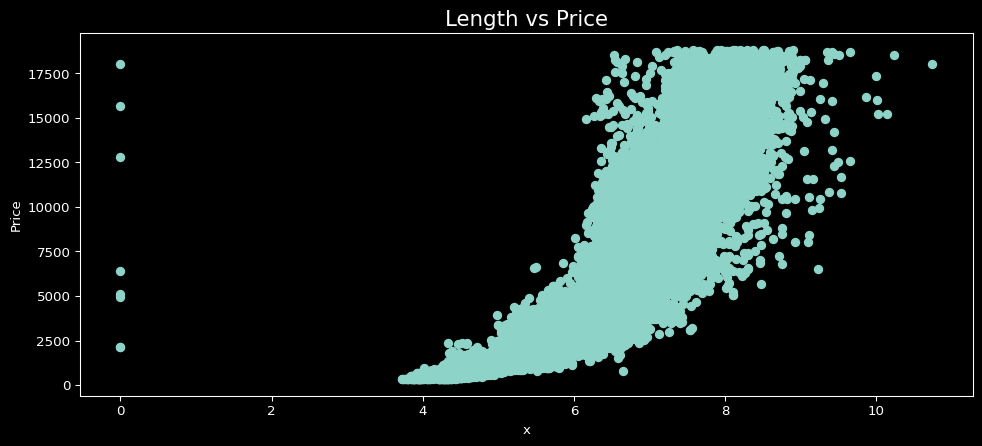

In [11]:
# Create scatter plot with attribute 'x' on X-axis and 'price' on Y-axis
plt.style.use('dark_background')
plt.figure(figsize = (12, 5), dpi = 96)
plt.title("Length vs Price", fontsize = 16) # x is 'length' dimension
plt.scatter(df['x'], df['price'])
plt.xlabel("x")
plt.ylabel("Price")
plt.show()

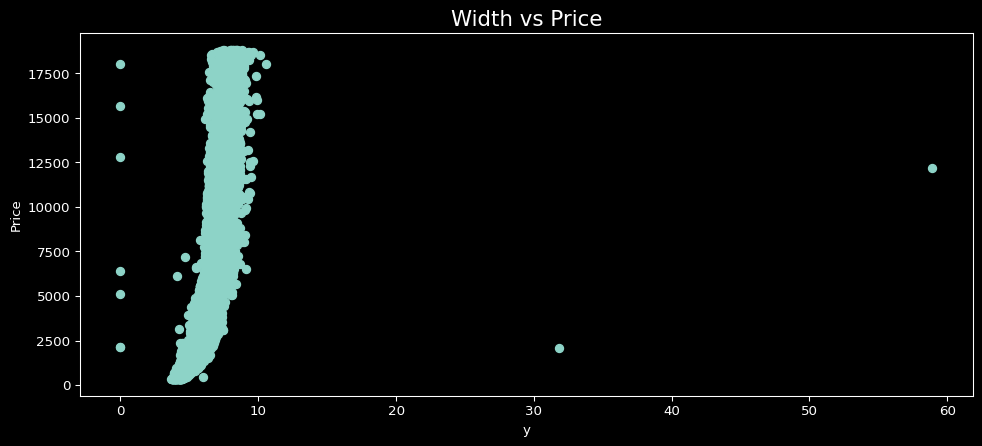

In [12]:
# Create scatter plot with attribute 'y' on X-axis and 'price' on Y-axis
plt.figure(figsize = (12, 5), dpi = 96)
plt.title("Width vs Price", fontsize = 16) # y is 'width'
plt.scatter(df['y'], df['price'])   
plt.xlabel("y")
plt.ylabel("Price")
plt.show()

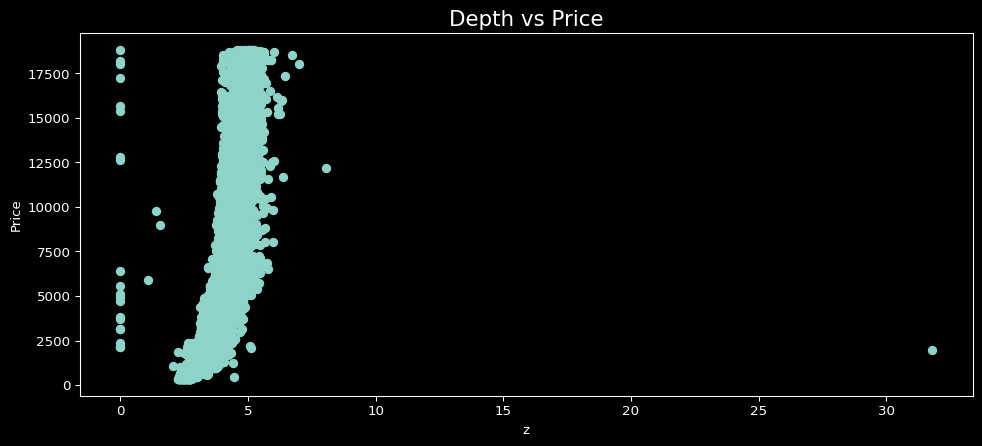

In [13]:
# Create scatter plot with 'z' on X-axis and 'price' on Y-axis
plt.style.use('dark_background')
plt.figure(figsize = (12, 5), dpi = 96)   
plt.title("Depth vs Price", fontsize = 16)   # z is depth
plt.scatter(df['z'], df['price'])
plt.xlabel("z")
plt.ylabel("Price")
plt.show()

**Q:** Which attribute exhibit best linear relationship with the target variable `price`?

**A:** `carat`

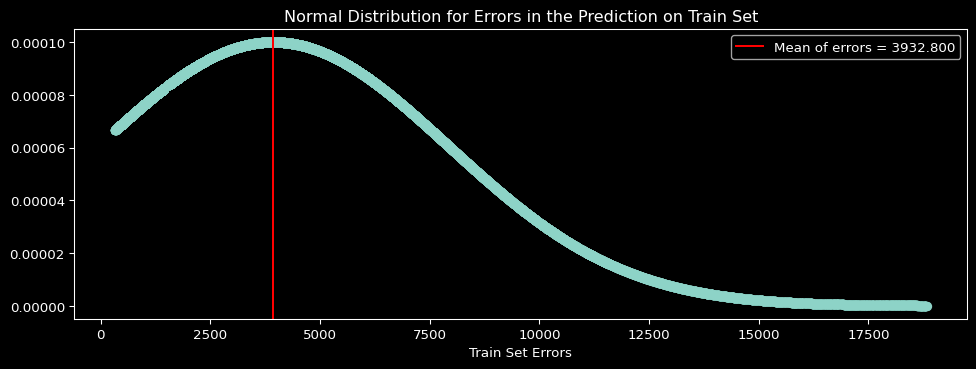

In [14]:
# Create a normal distribution curve for the `price`.

# Create a probablity density function for plotting the normal distribution
def prob_density_func(series):
  CONST = 1 / (series.std() * np.sqrt(2 * np.pi))
  power_of_e = - (series - series.mean()) ** 2 / (2 * series.var()) # 'pd.Series.var()' function returns the variance of the series.
  new_array = CONST * np.exp(power_of_e)
  return new_array

# Plot the normal distribution curve using plt.scatter() 
plt.figure(figsize = (12, 4), dpi = 96)
plt.scatter(df['price'], prob_density_func(df['price']))
plt.title("Normal Distribution for Errors in the Prediction on Train Set")
plt.axvline(x = df['price'].mean(), label = f"Mean of errors = {df['price'].mean():.3f}", color = 'r')
plt.xlabel("Train Set Errors")
plt.legend()
plt.show()

**Q:** What is the mean `price` of diamonds ?

**A:** $\$3932.8$

<!-- **Q:** In what range does $66$ percent of the diamonds could be found?

**A:** $3932.79 \pm 3989.43$  -->



---

#### 3. Feature Engineering

The dataset contains certain features that are categorical.  To convert these features into numerical ones, use `replace()` function of the DataFrame. 

**For example:** 

`df["column1"].replace({"a": 1, "b": 0}, inplace=True)` $\Rightarrow$ replaces all the `'a'` values with `1` and `'b'` values with `0` for feature `column1`. Use `inplace` boolean argument to to make changes in the DataFrame permanently.

Replace following values for `cut` column:

 - `Fair` with `1`
 - `Good` with `2`
 - `Very Good` with `3` 
 - `Premium` with `4`
 - `Ideal` with `5`

Replace following values for the `color` column:

- `D` with `1`
- `E` with `2`
- `F` with `3`
- `G` with `4`
- `H` with `5`
- `I` with `6`

Replace following values for the `clarity` column:

- `I1` with `1` 
- `SI2` with `2`
- `SI1` with `3`
- `VS2` with `4`
- `VS1` with `5`
- `VVS2` with `6`
- `VVS1` with `7`
- `IF` with `8`

In [15]:
# Replace values of 'cut' column
df['cut'].replace({'Fair':1, 'Good':2,'Very Good':3, 'Premium':4,'Ideal':5},inplace = True)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,5,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,4,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,2,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,4,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,2,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [16]:
# Replace values of 'color' column
df['color'].replace({'D':1, 'E':2,'F':3, 'G':4,'H':5,'I':6,'J':7},inplace = True)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,5,2,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,4,2,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,2,2,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,4,6,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,2,7,SI2,63.3,58.0,335,4.34,4.35,2.75


In [17]:
# Replace values of 'clarity' column
df['clarity'].replace({'I1':1, 'SI2':2,'SI1':3, 'VS2':4,'VS1':5,'VVS2':6,'VVS1':7,'IF':8}, inplace = True)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,5,2,2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,4,2,3,59.8,61.0,326,3.89,3.84,2.31
2,0.23,2,2,5,56.9,65.0,327,4.05,4.07,2.31
3,0.29,4,6,4,62.4,58.0,334,4.20,4.23,2.63
4,0.31,2,7,2,63.3,58.0,335,4.34,4.35,2.75


---

#### 4. Model Training 

Build a multiple linear regression model  using all the features of the dataset. Also, evaluate the model by calculating $R^2$, MSE, RMSE, and MAE values.


In [18]:
# Create a list of feature variables.
features = list(df.columns.values)
features.remove('price')
features

['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']

In [19]:
# Build multiple linear regression model using all the features

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = df[features] 
y = df['price']

# Split the DataFrame into the train and test sets such that test set has 33% of the values.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42) 


# Build linear regression model using the 'sklearn.linear_model' module.
sklearn_lin_reg = LinearRegression()
sklearn_lin_reg.fit(X_train, y_train)

# Print the value of the intercept
print("\nConstant".ljust(15, " "), f"{sklearn_lin_reg.intercept_:.6f}") 

# Print the names of the features along with the values of their corresponding coefficients.
for item in list(zip(X.columns.values, sklearn_lin_reg.coef_)):
  print(f"{item[0]}".ljust(15, " "), f"{item[1]:.6f}") 


Constant       5423.680710
carat           10720.976566
cut             118.658153
color           -323.814246
clarity         504.014258
depth           -79.948794
table           -28.248563
x               -846.553635
y               23.150374
z               -29.512329


In [20]:
# Evaluate the linear regression model using the 'r2_score', 'mean_squared_error' & 'mean_absolute_error' functions of the 'sklearn' module.
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

y_train_pred = sklearn_lin_reg.predict(X_train)
y_test_pred = sklearn_lin_reg.predict(X_test)

print(f"Train Set\n{'-' * 50}")
print(f"R-squared: {r2_score(y_train, y_train_pred):.3f}")
print(f"Mean Squared Error: {mean_squared_error(y_train, y_train_pred):.3f}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_train, y_train_pred)):.3f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_train, y_train_pred):.3f}")
      
print(f"\n\nTest Set\n{'-' * 50}")
print(f"R-squared: {r2_score(y_test, y_test_pred):.3f}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_test_pred):.3f}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_test_pred)):.3f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_test_pred):.3f}")

Train Set
--------------------------------------------------
R-squared: 0.907
Mean Squared Error: 1494736.330
Root Mean Squared Error: 1222.594
Mean Absolute Error: 809.247


Test Set
--------------------------------------------------
R-squared: 0.907
Mean Squared Error: 1450250.583
Root Mean Squared Error: 1204.264
Mean Absolute Error: 802.626


**Q:** What is the $R^2$ (R-squared) value for this model?

**A:** 90.7%



---

### 5. Dealing with Multicollinearity

Create a heatmap among all variables to identify a set of features which are highly correlated with each other.


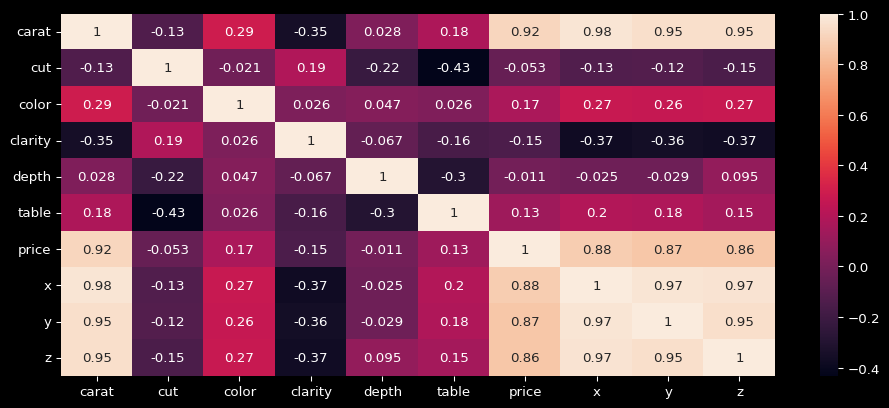

In [21]:
# Heatmap to pinpoint the columns in the 'df' DataFrame exhibiting high correlation
plt.figure(figsize = (12, 5), dpi = 96)
sns.heatmap(df.corr(), annot=True)
plt.show()

The features that are highly correlated with `price` are `carat`, `x`, `y` and `z`.

There is multicollinearity in the dataset i.e. many features are highly correlated with each other. Some of them are:
- `depth` is inversely related to `table`.
- `carat`, `x`, `y` and `z` are highly correlated with each other.

Let's consider the feature `carat` as it is highly correlated with the target variable `price`. Perform the following tasks:
1. Drop the features which are highly correlated with `carat`.
2. Calculate VIF (Variance Inflation Factor) for the remaining features.


In [22]:
# Drop features highly correlated with 'carat'

reduced_features = list(df.columns.drop(['x','y','z']))
reduced_features.remove('price')
reduced_features

['carat', 'cut', 'color', 'clarity', 'depth', 'table']

In [23]:
# Again build a linear regression model using the remaining features

X = df[reduced_features] 
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42) 

# Build linear regression model using the 'sklearn.linear_model' module.
sklearn_lin_reg2 = LinearRegression()
sklearn_lin_reg2.fit(X_train, y_train)

# Print the value of the intercept
print("\nConstant".ljust(15, " "), f"{sklearn_lin_reg.intercept_:.6f}") 

# Print the names of the features along with the values of their corresponding coefficients.
for item in list(zip(X.columns.values, sklearn_lin_reg2.coef_)):
  print(f"{item[0]}".ljust(15, " "), f"{item[1]:.6f}") 


Constant       5423.680710
carat           8799.498060
cut             119.798149
color           -319.163784
clarity         523.049968
depth           -45.019209
table           -27.742288


In [24]:
# Evaluate the linear regression model using the 'r2_score', 'mean_squared_error' & 'mean_absolute_error' functions of the 'sklearn' module.

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

y_train_pred = sklearn_lin_reg2.predict(X_train)
y_test_pred = sklearn_lin_reg2.predict(X_test)

print(f"Train Set\n{'-' * 50}")
print(f"R-squared: {r2_score(y_train, y_train_pred):.3f}")
print(f"Mean Squared Error: {mean_squared_error(y_train, y_train_pred):.3f}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_train, y_train_pred)):.3f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_train, y_train_pred):.3f}")
      
print(f"\n\nTest Set\n{'-' * 50}")
print(f"R-squared: {r2_score(y_test, y_test_pred):.3f}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_test_pred):.3f}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_test_pred)):.3f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_test_pred):.3f}")

Train Set
--------------------------------------------------
R-squared: 0.904
Mean Squared Error: 1534955.812
Root Mean Squared Error: 1238.933
Mean Absolute Error: 857.542


Test Set
--------------------------------------------------
R-squared: 0.904
Mean Squared Error: 1494513.472
Root Mean Squared Error: 1222.503
Mean Absolute Error: 850.554


Now eliminate the features having VIF values above 10 (if any).

In [25]:
# Calculate the VIF values for the remaining features using the 'variance_inflation_factor' function.
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Add a constant to feature variables 
X_train_sm = sm.add_constant(X_train)

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.values.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,5310.64
6,table,1.58
2,cut,1.48
5,depth,1.32
1,carat,1.29
4,clarity,1.19
3,color,1.12




All the features have VIF values less than 10. 

---

#### 6. Residual (Error) Analysis

Perform residual analysis to check if the residuals (errors) are normally distributed or not (which is one of the assumption of linear regression). For this, plot the  histogram of the residuals.

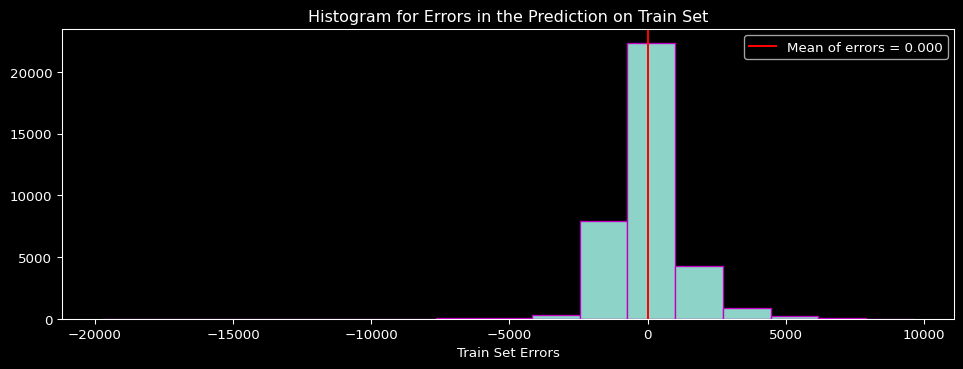

In [26]:
# Create a histogram for the errors obtained in the predicted values for the train set.
errors_train = y_train - y_train_pred

plt.figure(figsize = (12, 4), dpi = 96)
plt.hist(errors_train, bins = 'sturges', edgecolor = 'm')
plt.title("Histogram for Errors in the Prediction on Train Set")
plt.axvline(x = errors_train.mean(), label = f"Mean of errors = {errors_train.mean():.3f}", color = 'r')
plt.xlabel("Train Set Errors")
plt.legend()
plt.show()

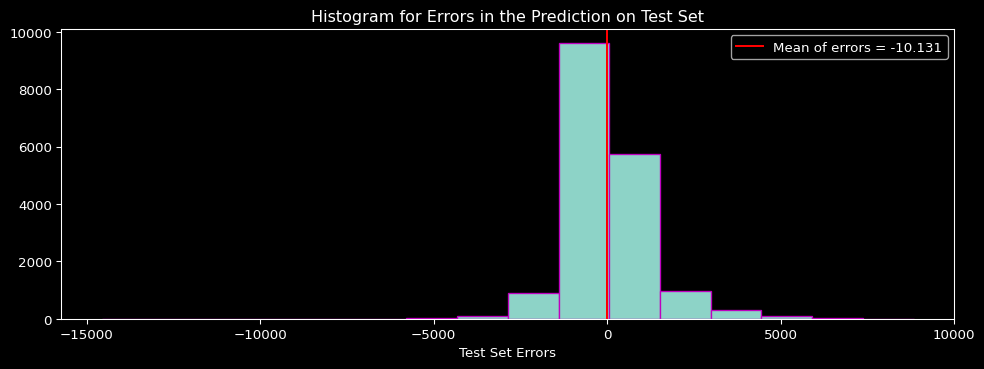

In [27]:
# Create a histogram for the errors obtained in the predicted values for the test set.
errors_test = y_test - y_test_pred

plt.figure(figsize = (12, 4), dpi = 96)
plt.hist(errors_test, bins = 'sturges', edgecolor = 'm')
plt.title("Histogram for Errors in the Prediction on Test Set")
plt.axvline(x = errors_test.mean(), label = f"Mean of errors = {errors_test.mean():.3f}", color = 'r')
plt.xlabel("Test Set Errors")
plt.legend()
plt.show()

The mean of errors is equal to 0 for train set.

The mean of errors for test set is -10.131 which is normal.


---

#### 7. Verify Homoscedasticity 

Check for Homoscedasticity (constant variance) by creating a scatter plot between the errors and the target variable. Determine whether there is some kind of relationship between the error and the target variable.

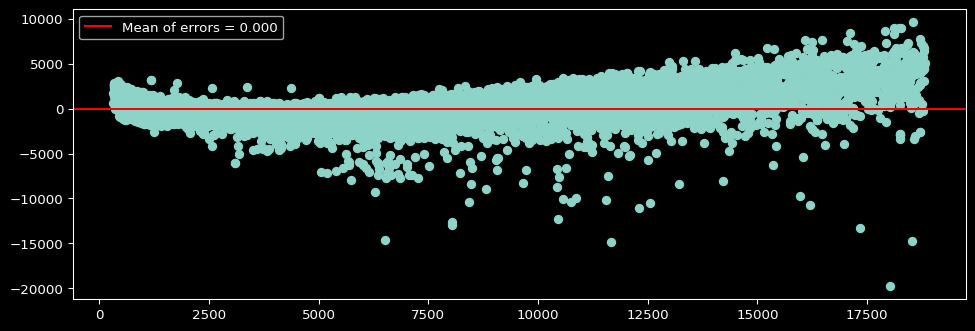

In [28]:
# Create a scatter plot between the errors and the dependent variable for the train set.
plt.figure(figsize = (12, 4), dpi = 96)
plt.scatter(y_train, errors_train)
plt.axhline(y = errors_train.mean(), color = 'r', label = f'Mean of errors = {errors_train.mean():.3f}')
plt.legend()
plt.show()



There is hardly any noticeable pattern or trend between the errors in the train set and the target variable. The variance in the errors for the train set is approximately constant i.e. it is not changing much. Hence, there is homoscedasticity between the errors w.r.t. the target.

---

###Multiple Linear Regression Model


### 8. Data Preparation
Extract numerical attributes from the dataset and create a heatmap to identify correlation among various numerical attributes.

In [29]:
# Extract all the numeric (float and int type) columns from the dataset.
numeric_df = df.select_dtypes(include=[int,float])
numeric_df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

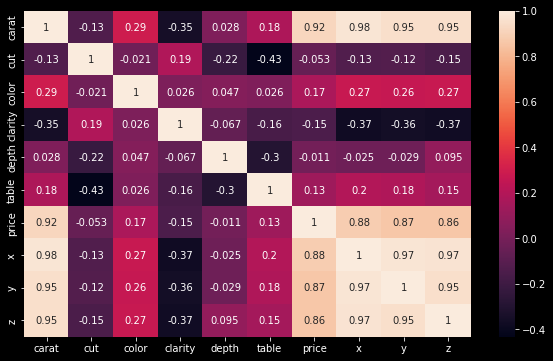

In [30]:
# Draw a correlation heatmap between the numeric features.
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True)
plt.show()

The features are highly correlated with price are: carat, x,y,z

There is multicollinearity in the dataset.


###9. Feature Encoding
The dataset contains certain columns that are categorical. However for linear regression, we need all numerical variables. Perform one-hot encoding to obtain numeric values from non-numeric categorical values.

In [31]:
# Create a new dataframe having dummy variables for all the categorical type columns of the dataset using 'get_dummies()' function.
dummies_df = pd.get_dummies(df,dtype=int) #one-hot feature encoding n value-n columns
dummies_df 

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,5,2,2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,4,2,3,59.8,61.0,326,3.89,3.84,2.31
2,0.23,2,2,5,56.9,65.0,327,4.05,4.07,2.31
3,0.29,4,6,4,62.4,58.0,334,4.20,4.23,2.63
4,0.31,2,7,2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,5,1,3,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,2,1,3,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,3,1,3,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,4,5,2,61.0,58.0,2757,6.15,6.12,3.74


In [32]:
# Print the information of the new dataframe obtained after one-hot encoding
dummies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  int64  
 2   color    53940 non-null  int64  
 3   clarity  53940 non-null  int64  
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(4)
memory usage: 4.1 MB


###Train-Test Split
We need to predict the value of price variable, using other variables. Thus, price is the target or dependent variable and other columns except price are the features or the independent variables.

Split the dataset into training set and test set such that the training set contains 70% of the instances and the remaining instances will become the test set and keep the price as the target variables.

In [33]:
# Split the 'df' Dataframe into the train and test sets.
from sklearn.model_selection import train_test_split
X = list(dummies_df.columns)
y= df['price']
X_train,X_test,y_train,y_test = train_test_split(dummies_df[X],y,test_size=0.30,random_state=42)

In [34]:
# Create separate data-frames for the feature and target variables for both the train and test sets.
print(X_train.head())
print(X_test.head())

       carat  cut  color  clarity  depth  table  price     x     y     z
19497   1.21    5      5        6   61.3   57.0   8131  6.92  6.87  4.23
31229   0.31    5      2        4   62.0   56.0    756  4.38  4.36  2.71
22311   1.21    5      2        5   62.4   57.0  10351  6.75  6.83  4.24
278     0.81    5      3        2   62.6   55.0   2795  5.92  5.96  3.72
6646    0.79    5      6        6   61.7   56.0   4092  5.94  5.95  3.67
       carat  cut  color  clarity  depth  table  price     x     y     z
1388    0.24    5      4        7   62.1   56.0    559  3.97  4.00  2.47
50052   0.58    3      3        6   60.0   57.0   2201  5.44  5.42  3.26
41645   0.40    5      2        6   62.1   55.0   1238  4.76  4.74  2.95
42377   0.43    4      2        6   60.8   57.0   1304  4.92  4.89  2.98
17244   1.55    5      2        2   62.3   55.0   6901  7.44  7.37  4.61


###10. Model Training using statsmodels.api
Now build a multiple linear regression model using the statsmodels.api module. Also, print the summary of the linear regression model built.

In [35]:
#  Build a linear regression model using all the features to predict insurance charges.
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()
lr.params

const     -4.055423e-12
carat     -1.343814e-12
cut       -9.280077e-14
color      7.806256e-15
clarity    1.192310e-13
depth      3.406650e-14
table      6.961792e-14
price      1.000000e+00
x          2.007283e-13
y          4.879430e-14
z          3.116118e-13
dtype: float64

In [36]:
# Print the summary of the linear regression report.
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.523e+33
Date:                Sun, 13 Feb 2022   Prob (F-statistic):               0.00
Time:                        13:20:03   Log-Likelihood:             9.4072e+05
No. Observations:               37758   AIC:                        -1.881e+06
Df Residuals:                   37747   BIC:                        -1.881e+06
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.055e-12   1.52e-12     -2.663      0.0

The value of a Adj. R-squared: 1.000 for this model which means the accuracy of this model is 0.99 approx.

### Conclusion
 

I have built two prediction models namely linear regression and multiple linear regression to predict the price of diamonds so that any company knows how much it should bid for the diamonds.

The multiple linear regression model was more successful as it had accuracy of 99.99% .


---